<a href="https://colab.research.google.com/github/mrodrigues05/Otimizacao-de-Portfolio/blob/main/Otim_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Otimização de Portfólio Relação Risco x Retorno em carteiras de investimento** <br>

 
Matriz de covariânça da carteira
          A         B         C
A  0.102785  0.013396 -0.015790
B  0.013396  3.266941 -0.138910
C -0.015790 -0.138910  0.134395


Text(0, 0.5, 'RETORNO ESPERADO')

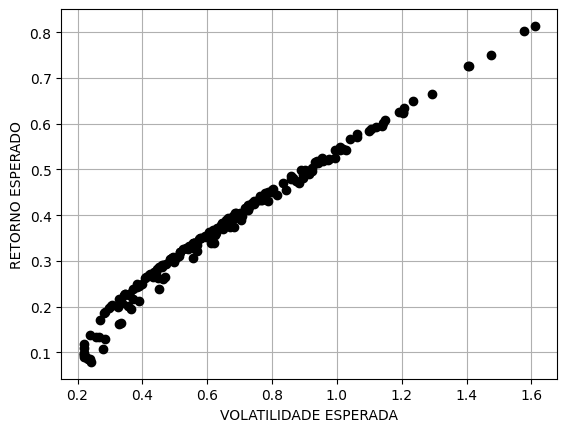

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#nomes dos ativos
ativo = ['A','B','C']
n=len(ativo)

#construção dos ativos
A=np.array([4,5,6,5,5,6,7,8,4,3,5])
B=np.array([1,5,10,4,11,7,8,3,1,5,7])
C=np.array([3,4,3,4,5,6,5,3,5,3,4])

#data frame dos ativos
df=pd.DataFrame([A,B,C],index=ativo)
prec=df.T #Colocando os dados em colunas através da transposta

#retorno dos preços (utilizaremos a formula classica para calc. o retorno financeiro)
ri=prec/prec.shift(1)-1
mi=ri.mean()    #retorno médio dos ativos por coluna
sigma=ri.cov()  #matriz de covariânca da carteira
print(' ')
print('Matriz de covariânça da carteira')
print(sigma)

#Pesos de alocação dos investimentos
# w=np.array([0.6,0.3,0.1])

vet_R=[]
vet_Vol=[]
for i in range(200):
  #peso de alocação dos investimentos
  w=np.random.random(n)
  w=w/np.sum(w)
  #Retorno e risco da carteira
  retorno=np.sum(w*mi)
  risco=np.sqrt(np.dot(w.T,np.dot(sigma,w)))
  #
  vet_R.append(retorno)
  vet_Vol.append(risco)

plt.plot(vet_Vol,vet_R,'ok')
plt.grid()
plt.xlabel('VOLATILIDADE ESPERADA')
plt.ylabel('RETORNO ESPERADO')




Após a fomalização da ideia agora vamos fazer o mesmo porém com dados reais com os preços de fechamento na *Bovespa*.

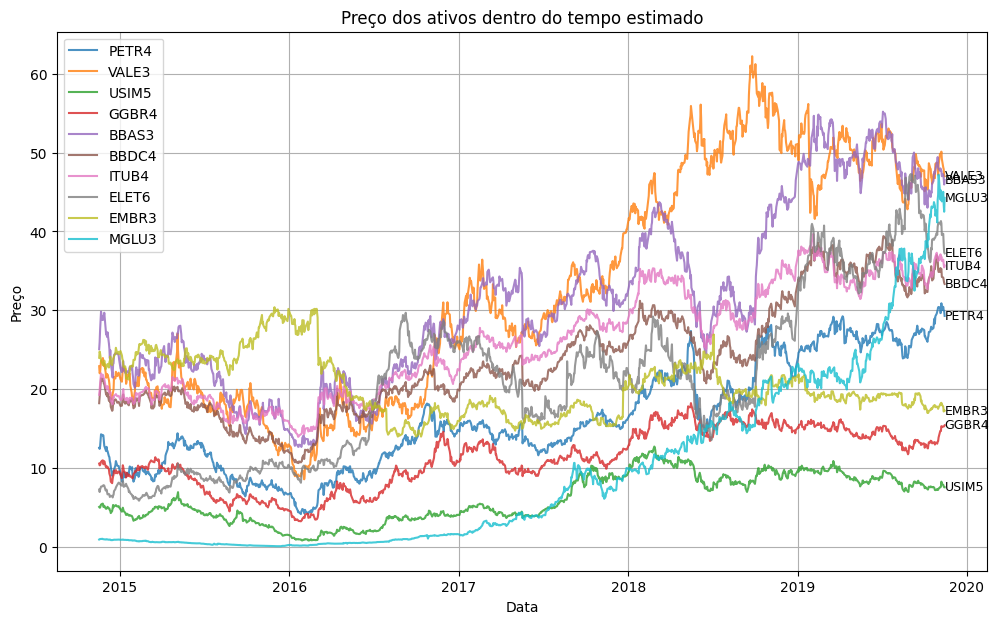

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('Portfolio_Bov.xlsx', sheet_name='BOV')
list_assets = ['PETR4','VALE3','USIM5','GGBR4','BBAS3','BBDC4','ITUB4','ELET6','EMBR3','MGLU3']

plt.figure(figsize=(12, 7))
plt.grid(True)

for asset in list_assets:
    plt.plot(df.Date, df[asset], alpha=0.8, label=asset)
    # Add text label at the end of the line
    last_date = df.Date.iloc[-1]
    last_price = df[asset].iloc[-1]
    plt.text(last_date, last_price, asset, fontsize=9, verticalalignment='center')

plt.legend()
plt.xlabel('Data')
plt.ylabel('Preço')
plt.title('Preço dos ativos dentro do tempo estimado')
plt.show()

Trabalhando com os retornos e as covariânças anualizadas sempre que tivermos uma amostragem com fechamentos diários.

In [ ]:
n=len(df)
#excluindo as colunas de datas para o cálculo de retorno
prec=df.drop(['Date'],axis=1)

#Retorno dos preços
ri=prec/prec.shift(1)-1
mi=ri.mean().values*252
sigma=ri.cov()*252
print(' ')
print('+++++++++++++++++Matriz de covariânça da carteira+++++++++++++++++')
display(sigma)

 
+++++++++++++++++Matriz de covariânça da carteira+++++++++++++++++


,PETR4,VALE3,USIM5,GGBR4,BBAS3,BBDC4,ITUB4,ELET6,EMBR3,MGLU3
PETR4,0.259488,0.108853,0.146695,0.114041,0.142953,0.102926,0.090650,0.102150,0.021384,0.079352
VALE3,0.108853,0.243447,0.142245,0.142276,0.069107,0.056229,0.047418,0.040763,0.031678,0.059511
USIM5,0.146695,0.142245,0.406590,0.192181,0.130706,0.095058,0.079750,0.100652,0.012579,0.102315
GGBR4,0.114041,0.142276,0.192181,0.234769,0.095007,0.076367,0.063428,0.070650,0.026586,0.073094
BBAS3,0.142953,0.069107,0.130706,0.095007,0.199303,0.114441,0.102681,0.107419,0.014405,0.093244
BBDC4,0.102926,0.056229,0.095058,0.076367,0.114441,0.115023,0.088870,0.074796,0.015045,0.062948
ITUB4,0.090650,0.047418,0.079750,0.063428,0.102681,0.088870,0.092097,0.066911,0.017161,0.054886
ELET6,0.102150,0.040763,0.100652,0.070650,0.107419,0.074796,0.066911,0.262736,0.021788,0.059974
EMBR3,0.021384,0.031678,0.012579,0.026586,0.014405,0.015045,0.017161,0.021788,0.116195,0.018929
MGLU3,0.079352,0.059511,0.102315,0.073094,0.093244,0.062948,0.054886,0.059974,0.018929,0.428933


Agora fazemos a simulação numérica para aplicação de pesos aleatórios.

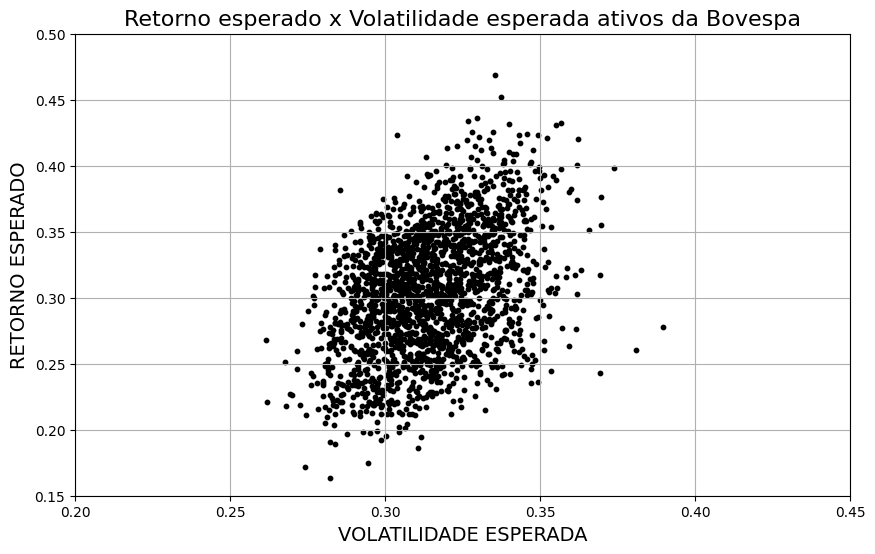

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

vet_R = []
vet_Vol = []
for i in range(2000):  # aumentei p/ ficar mais cheio
    # peso de alocação dos investimentos
    w = np.random.random(len(list_assets))
    w = w / np.sum(w)
    # Retorno e risco da carteira
    retorno = np.sum(w * mi)
    risco = np.sqrt(np.dot(w.T, np.dot(sigma, w)))
    #
    vet_R.append(retorno)
    vet_Vol.append(risco)

plt.figure(figsize=(10,6))
plt.scatter(vet_Vol, vet_R, c="black", s=10)  # scatter p/ dispersão
plt.grid(True)

# limites dos eixos
plt.xlim(0.20, 0.45)
plt.ylim(0.15, 0.50)

# labels e título
plt.xlabel('VOLATILIDADE ESPERADA', fontsize=14)
plt.ylabel('RETORNO ESPERADO', fontsize=14)
plt.title('Retorno esperado x Volatilidade esperada ativos da Bovespa', fontsize=16)

plt.show()


Agora vamos apresentar a mesma relação para um portfólio de moedas estrangeiras com cotação em reais.

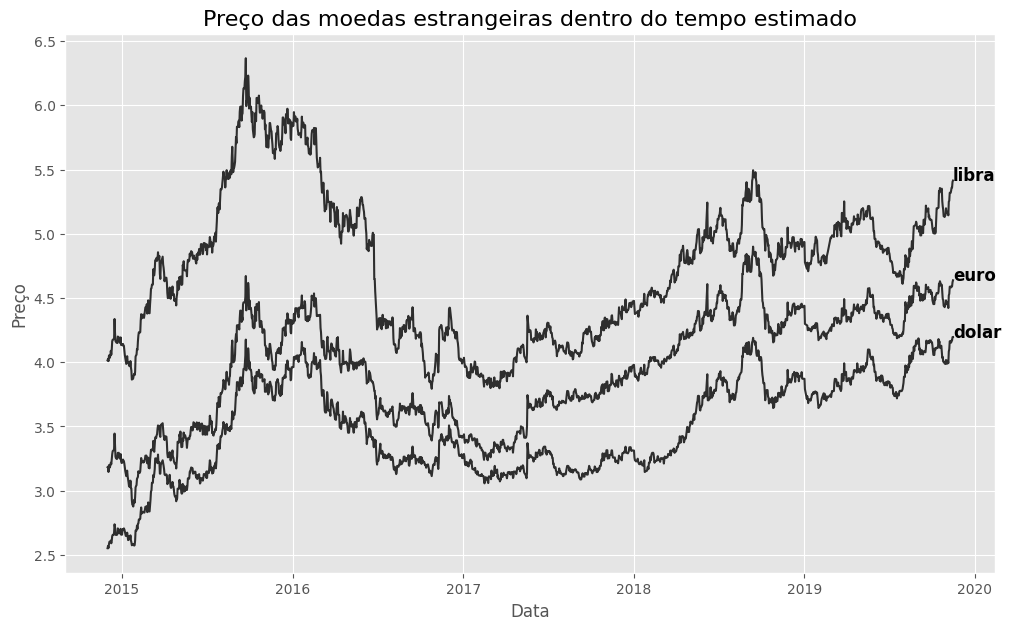


*********** Matriz de covariância da carteira *******


,dolar,euro,libra
dolar,0.021160,0.018042,0.017755
euro,0.018042,0.022319,0.019994
libra,0.017755,0.019994,0.023750


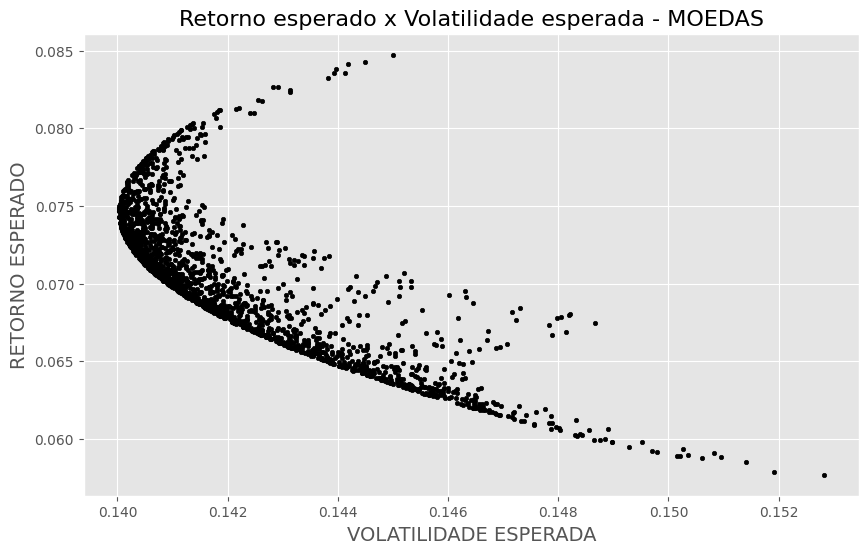

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carregar dados
df = pd.read_excel('Portfolio_Moedas.xlsx', sheet_name='moedas')
currency_list = ['dolar','euro','libra']

# Plotar as moedas
plt.style.use('ggplot')
plt.figure(figsize=(12, 7))
plt.grid(True)
plt.plot(df.data, df[currency_list], '-k', alpha=0.8)

# Adicionar rótulos no final de cada linha
for i in range(len(currency_list)):
    plt.text(
        x=df.data.iloc[-1],
        y=df[currency_list[i]].iloc[-1],
        s=currency_list[i],
        fontsize=12,
        color='k',
        weight='bold'
    )

plt.xlabel('Data', fontsize=12)
plt.ylabel('Preço', fontsize=12)
plt.title('Preço das moedas estrangeiras dentro do tempo estimado', fontsize=16)
plt.show()

# Cálculo de retorno e covariância anualizados
prec = df.drop(['data'], axis=1)
ri = prec / prec.shift(1) - 1
mi = ri.mean().values * 252
sigma = ri.cov() * 252

print('\n' + '*********** Matriz de covariância da carteira *******')
display(sigma)

# Simulação numérica para aplicação de pesos aleatórios
vet_R = []
vet_Vol = []
num_portfolios = 2000 # Increased for better visualization

for i in range(num_portfolios):
    # Pesos de alocação dos investimentos
    w = np.random.random(len(currency_list))
    w = w / np.sum(w)

    # Retorno e risco da carteira
    retorno = np.sum(w * mi)
    risco = np.sqrt(np.dot(w.T, np.dot(sigma, w)))

    vet_R.append(retorno)
    vet_Vol.append(risco)

# Plotar o gráfico de retorno x volatilidade
plt.figure(figsize=(10,6))
plt.scatter(vet_Vol, vet_R, c="black", s=10)
plt.grid(True)

plt.xlabel('VOLATILIDADE ESPERADA', fontsize=14)
plt.ylabel('RETORNO ESPERADO', fontsize=14)
plt.title('Retorno esperado x Volatilidade esperada - MOEDAS', fontsize=16)
plt.show()